# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Packages for date conversions for calculating trip durations
from datetime import datetime, time

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df.shape

(22699, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop_duplicates()

Use `.describe()`.

In [8]:
# Use .describe()
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [9]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [11]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [12]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['duration'] = df['duration'].round(2)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

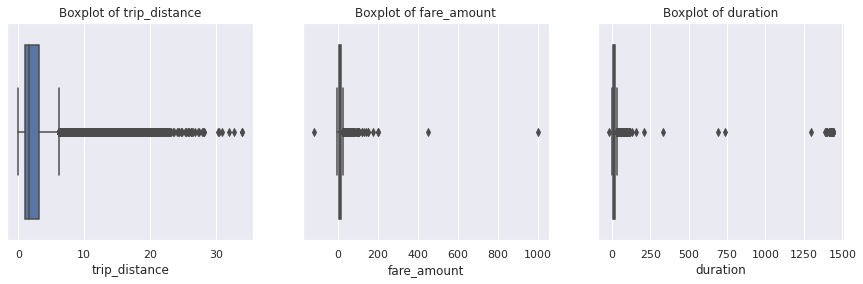

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x=df['trip_distance'], ax=axes[0])
axes[0].set_title('Boxplot of trip_distance')

sns.boxplot(x=df['fare_amount'], ax=axes[1])
axes[1].set_title('Boxplot of fare_amount')

sns.boxplot(x=df['duration'], ax=axes[2])
axes[2].set_title('Boxplot of duration');

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**Answer:**

1. All there variables contain a lot of outliers.

2. From the previous course EDA, `trip_distance` above 30 miles as outliers are reasonable. 

3. `trip_distance` of 0 is reasonable but `fare_amount` and `duration` is questionable and need more investigations.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [15]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted_distances = df['trip_distance'].sort_values().drop_duplicates().reset_index(drop=True).to_frame()
sorted_distances.head(10)

,trip_distance
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04
5,0.05
6,0.06
7,0.07
8,0.08
9,0.09


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [16]:
(df['trip_distance'] == 0).sum()

148

Only 148 values of 0 in `trip_distance` in ~23,000 rides are relatively small so we can let it stay intact because it will not have much effect on our model.

#### `fare_amount` outliers

In [17]:
df[['fare_amount']].describe()

,fare_amount
count,22699.000000
mean,13.026629
std,13.243791
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


**Question:** What do you notice about the values in the `fare_amount` column?

**Answer:**

The `fare_amount` column in the dataset contains some interesting observations:

- The minimum value is negative (-120), which is impossible for a fare. This is likely due to an error in the data collection process. 
- The mean value (13) is larger than the median value (9.5), indicating that the distribution of fare_amount is right-skewed. This means that there are a few very large fares that are pulling the mean up. 
- The maximum fare is 999, which is far larger than the 75th percentile value of 14.5. This suggests that there are a small number of very high-cost fares that are skewing the distribution.

Impute values < $0 with `0`.

In [18]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [19]:
import time

def outliers_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    print("Stand by...")
    time.sleep(1.5)
    print()
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr) 

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        
    return df[[col]].describe()



In [20]:
outliers_imputer(['fare_amount'], 6)

Stand by...



,fare_amount
count,22699.000000
mean,12.897913
std,10.541137
min,0.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,62.500000


#### `duration` outliers


In [21]:
# Call .describe() for duration outliers
df[['duration']].describe()

,duration
count,22699.000000
mean,17.013766
std,61.996476
min,-16.980000
25%,6.650000
50%,11.180000
75%,18.380000
max,1439.550000


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [22]:
# Impute a 0 for any negative values and Impute the high outliers
outliers_imputer(['duration'], 6)

Stand by...



,duration
count,22699.000000
mean,14.460471
std,11.946570
min,0.000000
25%,6.650000
50%,11.180000
75%,18.380000
max,88.760000


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [23]:
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)

In [24]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'] + " " + df['DOLocationID']

In [25]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [26]:
grouped = df.groupby('pickup_dropoff')[['trip_distance']].mean().round(2)
grouped

,trip_distance
pickup_dropoff,
1 1,2.43
10 148,15.70
100 1,16.89
100 100,0.25
100 107,1.18
...,...
97 65,0.50
97 66,1.40
97 80,3.84


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [27]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [28]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07,100 231,3.52
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50,186 43,3.11
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20,262 236,0.88
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25,188 97,3.70
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72,4 112,4.44


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [29]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict2 = df.groupby('pickup_dropoff')[['duration']].mean().round(2)
grouped_dict2 = grouped_dict2.to_dict()
grouped_dict2 = grouped_dict2['duration']

# Confirm that it worked
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict2)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,14.07,100 231,3.52,22.85
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,26.50,186 43,3.11,24.47
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,7.20,262 236,0.88,7.25
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,30.25,188 97,3.70,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,16.72,4 112,4.44,14.62


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [30]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.07,100 231,3.52,22.85,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.50,186 43,3.11,24.47,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.20,262 236,0.88,7.25,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.25,188 97,3.70,30.25,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.72,4 112,4.44,14.62,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00
* If day is Saturday or Sunday, impute 0 in `rush_hour` column

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [31]:
# Create 'rush_hour' col
# weekday mask
# Weekday mask
weekday_mask = (df['day'] != 'Saturday') & (df['day'] != 'Sunday')

# Hour mask
pickup = df['tpep_pickup_datetime'].dt.hour
dropoff = df['tpep_dropoff_datetime'].dt.hour
day_mask = (pickup >= 6) & (pickup <= 10) & (dropoff >= 6) & (dropoff <= 10)
night_mask = (pickup >= 16) & (pickup <= 20) & (dropoff >= 16) & (dropoff <= 20)

df['rush_hour'] = weekday_mask & (day_mask | night_mask)
df['rush_hour'] = df['rush_hour'].astype(int)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.07,100 231,3.52,22.85,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.50,186 43,3.11,24.47,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.20,262 236,0.88,7.25,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.25,188 97,3.70,30.25,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.72,4 112,4.44,14.62,Saturday,April,0


Since we already have the `weekday_mask` that excludes Saturdays and Sundays, there is no need to explicitly impute 0 for those days again. We can directly use `weekday_mask` to filter out those days.



### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

Text(0.5, 1.0, 'Relationship between mean_duration and fare_amount')

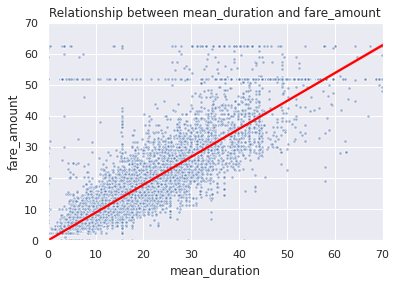

In [32]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.regplot(data=df, x='mean_duration', y='fare_amount', 
            scatter_kws={'alpha':0.5, 's':10, 'edgecolor':'white' }, 
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Relationship between mean_duration and fare_amount')

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [33]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

**Note:**

There are 514 trips with `fare_amount` of 52 and 84 trips with `fare_amount` of 62.5, which explains the prominence of the two horizontal lines in the plot.

The horizontal line at 62.5 is reasonable we because we have impute all outliers above the `Q3 + (6 * IQR)` to `Q3 + (6 * IQR)` value, which is 62.5

About the horizontal line at 52, we need conduct more analysis to fully understand.

Examine the first 30 of these trips.

In [34]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.80,236 132,19.21,40.50,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.85,132 163,19.23,52.94,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.97,132 132,2.26,3.02,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.18,132 79,19.43,47.27,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.48,132 234,17.65,49.83,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.83,132 48,18.76,58.24,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.62,228 88,4.73,15.62,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.45,132 48,18.76,58.24,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.85,186 132,17.10,42.92,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.58,132 148,17.99,46.34,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

**Answer:**

The fare amount of \\$52 is peculiar because it occurs frequently for trips that originate or terminate at location 132 and have a RatecodeID of 2. These trips seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54, which suggests that location 132 is in an area that frequently requires tolls to get to and from. This is likely an airport.

According to the data dictionary, a RatecodeID of 2 indicates trips to JFK, which stands for John F. Kennedy International Airport in Queens. A quick Google search confirms that in 2017, the year of data collection, there was indeed a **flat fare of 52** for taxi trips between JFK Airport and Manhattan.

Given that the RatecodeID is known and can be reliably imputed back into the data, we can confidently adjust the fare amount for these specific trips to the correct value of $52. This way, we ensure the accuracy of these particular data points while still benefiting from the model's predictions for other data.

In summary, handling specific fare amounts like $52 for JFK trips requires domain knowledge and external information to make precise adjustments and maintain data quality. This approach allows us to incorporate this knowledge while utilizing the model for the rest of the dataset.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  object        
 9   DOLocationID           22699 non-null  object        
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [36]:
dfz = df.copy()

dfz = dfz.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

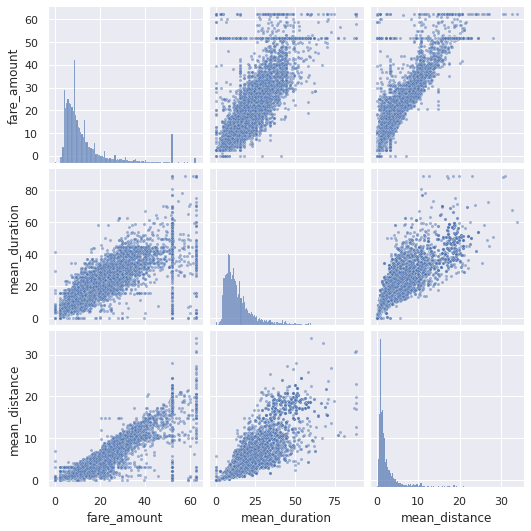

In [37]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(dfz[['fare_amount', 'mean_duration', 'mean_distance']], 
             plot_kws={'alpha':0.5, 's':10, 'edgecolor':'white' })

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [38]:
# Correlation matrix to help determine most correlated variables
corr = dfz.corr()
corr

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004737,0.001873,-0.001615
passenger_count,0.266463,1.000000,0.014942,0.013433,0.015851,-0.022053
fare_amount,0.001045,0.014942,1.000000,0.910187,0.859109,-0.047386
mean_distance,0.004737,0.013433,0.910187,1.000000,0.874869,-0.065765
mean_duration,0.001873,0.015851,0.859109,0.874869,1.000000,-0.049862
rush_hour,-0.001615,-0.022053,-0.047386,-0.065765,-0.049862,1.000000


Visualize a correlation heatmap of the data.

In [39]:
mask=np.triu(np.ones(corr.shape, dtype=bool))

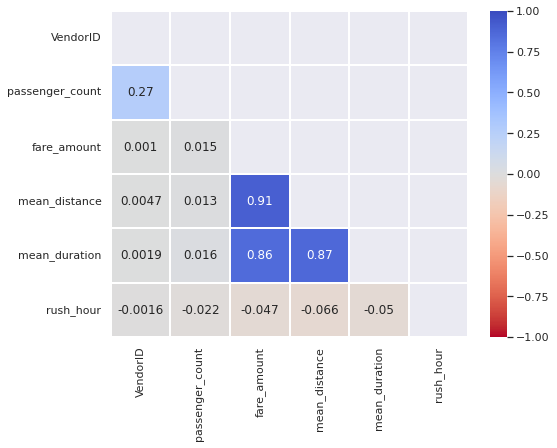

In [40]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask = mask, annot=True, cmap='coolwarm_r', linecolor = 'white', linewidth=1, vmin = -1, vmax=1);

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

**Answer:**

Both `mean_distance` and `mean_duration` are highly correlated with `fare_amount`. However, they are correlated with each other as well, this suggests that there is some degree of multicollinearity between the predictor variables.

Other variables has weak correlations with the `fare_amount` so we shouldn't include them in our model.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [41]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [65]:
# Remove the target column from the features
X = dfz[['mean_distance', 'mean_duration']]

# Set y variable
y = dfz['fare_amount']

# Display first few rows
X.head()

,mean_distance,mean_duration
0,3.52,22.85
1,3.11,24.47
2,0.88,7.25
3,3.70,30.25
4,4.44,14.62


### Task 8b. Pre-process data


Dummy encode categorical variables

In [66]:
# Convert VendorID to string
### YOUR CODE HERE ###

# Get dummies
### YOUR CODE HERE ###

### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [67]:
# Standardize the X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 0.17049666  0.83224007]
 [ 0.05529393  0.99294467]
 [-0.57129655 -0.71528572]
 ...
 [-0.627493   -0.77877396]
 [-0.23411782  0.21719777]
 [-0.40270718 -0.50200492]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [68]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Instantiate your model and fit it to the training data.

In [69]:
# Fit your model to the training data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Print the intercept and slope (coefficients) of the linear regression model
print(f"Intercept:{model.intercept_:}")
print(f"Slope (Coefficients): {model.coef_}")

Intercept:3.059386698727467
Slope (Coefficients): [1.99266555 0.27914628]


In [71]:
# Combine X_train and y_train into a single DataFrame for OLS regression
train_data = pd.concat([X_train, y_train], axis=1)

# Perform OLS regression using the training data
OLS = smf.ols(formula="fare_amount ~ mean_distance + mean_duration", data=train_data)
model_result = OLS.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 4.756e+04
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:06:03   Log-Likelihood:                -51961.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18156   BIC:                         1.040e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0594      0.062     49.685      0.000       2.939       3.180
mean_distance     1.9927      0.018    110.196      0.000       1.957       2.028
mean_duration     0.2791      0.006     43.615      0.000       0.267       0.292
==============================================================================
Omnibus:                    21338.947   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3380030.796
Skew:                           6.128   Prob(JB):                         0.00
Kurtosis:                      68.704   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [78]:
# Evaluate the model performance on the training data
# Make predictions using the trained model on the test data (X_test)
y_pred_train = model.predict(X_train)

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum((y_train - y_pred_train)**2)

# Calculate Explained Variance Score (R^2)
r_squared = metrics.r2_score(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_train, y_pred_train)

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_train, y_pred_train)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Residual Sum of Squares (RSS): {rss:<10.2f}")
print(f"Explained Variance Score (R^2): {r_squared:<10.2f}")
print(f"Mean Absolute Error (MAE): {mae:<10.2f}")
print(f"Mean Squared Error (MSE): {mse:<10.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:<10.2f}")

Residual Sum of Squares (RSS): 325125.47 
Explained Variance Score (R^2): 0.84      
Mean Absolute Error (MAE): 2.19      
Mean Squared Error (MSE): 17.90     
Root Mean Squared Error (RMSE): 4.23      


* The **Residual Sum of Squares (RSS)** is 325125.47. This means that the total error of the model is 325125.47. A lower RSS is better, as it means that the model is more accurate.
* The **Explained Variance Score (R^2)** is 0.84. This means that the model explains 84% of the variance in the data. A higher R^2 is better, as it means that the model is more capable of explaining the data.
* The **Mean Absolute Error (MAE)** is 2.19. This means that the average difference between the predicted values and the actual values is 2.19. A lower MAE is better, as it means that the model is more accurate.
* The **Mean Squared Error (MSE)** is 17.90. This means that the average squared difference between the predicted values and the actual values is 17.90. A lower MSE is better, as it means that the model is more accurate.
* The **Root Mean Squared Error (RMSE)** is 4.23. This means that the square root of the average squared difference between the predicted values and the actual values is 4.23. A lower RMSE is better, as it means that the model is more accurate.

Overall, the metrics you provided suggest that the model is fairly accurate. 

### Test data

Calculate the same metrics on the test data.

In [79]:
# Evaluate the model performance on the testing data
# Make predictions using the trained model on the test data (X_test)
y_pred_test = model.predict(X_test)

# Calculate the Residual Sum of Squares (RSS) for test data
rss_test = np.sum((y_test - y_pred_test)**2)

# Calculate Explained Variance Score (R^2) for test data
r_squared_test = metrics.r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Error (MAE) for test data
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for test data
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

# Calculate Root Mean Squared Error (RMSE) for test data
rmse_test = np.sqrt(mse_test)

# Print the metrics for test data
print(f"Residual Sum of Squares (RSS) for test data: {rss_test:<10.2f}")
print(f"Explained Variance Score (R^2) for test data: {r_squared_test:<10.2f}")
print(f"Mean Absolute Error (MAE) for test data: {mae_test:<10.2f}")
print(f"Mean Squared Error (MSE) for test data: {mse_test:<10.2f}")
print(f"Root Mean Squared Error (RMSE) for test data: {rmse_test:<10.2f}")


Residual Sum of Squares (RSS) for test data: 65183.95  
Explained Variance Score (R^2) for test data: 0.87      
Mean Absolute Error (MAE) for test data: 2.14      
Mean Squared Error (MSE) for test data: 14.36     
Root Mean Squared Error (RMSE) for test data: 3.79      


**Note:**

Overall, the metrics for the test data also suggest that the model is fairly accurate on the test data. 

The RSS, R^2, MAE, and MSE are all relatively low, which means that the model is able to explain a large amount of the variance in the test data and the average difference between the predicted values and the actual values on the test data is relatively small.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [109]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test, 'predicted': y_pred_test})
results['residuals'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residuals
5818,14.0,12.496565,1.503435
18134,28.0,16.452062,11.547938
4655,5.5,6.836743,-1.336743
7378,15.5,16.354695,-0.854695
13914,9.5,10.532887,-1.032887


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

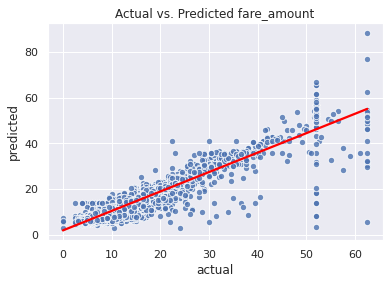

In [110]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.regplot(data=results, y='predicted', x='actual', 
            line_kws={'color':'red'},
            scatter_kws={'edgecolor':'white', 's':40}, ci=True)
plt.title('Actual vs. Predicted fare_amount');

Visualize the distribution of the `residuals` using a histogram.

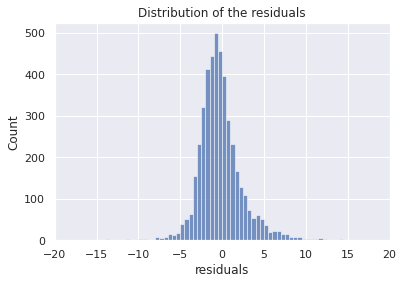

In [125]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residuals'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlim(-20, 20);

In [126]:
# Calculate residual mean
results['residuals'].mean()

-0.015650024041795177

**Note:**

The distribution of the residuals is normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the models errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

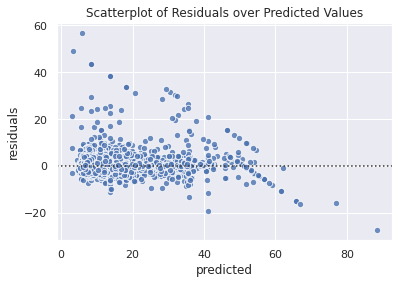

In [136]:
# Create a scatterplot of `residuals` over `predicted`
sns.residplot(data=results, x='predicted', y='residuals', 
              scatter_kws={'edgecolor':'white', 's':40})
plt.title('Scatterplot of Residuals over Predicted Values');

**Note:**
    
The model's residuals are evenly distributed above and below zero, with the exception of the two sloping lines from the upper-left corner to the lower-right corner, which we know are the imputed maximum of \\$62.50 and the flat rate of $52 for JFK airport trips.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [141]:
model.coef_

array([1.99266555, 0.27914628])

In [143]:
coefficients = pd.DataFrame(model.coef_.reshape(1, -1), columns=X.columns)
coefficients

,mean_distance,mean_duration
0,1.992666,0.279146


The coefficient for the `mean_distance` feature is 1.992666, which is the largest coefficient. This means that the mean distance has the greatest effect on trip fare. The coefficient for the `mean_duration` feature is 0.279146, which is much smaller than the coefficient for the mean_distance feature. This means that the mean duration has a smaller effect on trip fare.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

2. What results can be presented from this notebook?


**Answer:**

1. Key Takeaways:
   - The dataset contains information about taxi trips in New York City, including features such as trip distance, trip duration, pickup and drop-off locations, fare amount, and more.
   - Data preprocessing steps, such as handling missing values, removing outliers, and converting data types, were performed to prepare the data for analysis and modeling.
   - Exploratory Data Analysis (EDA) techniques were used to understand the distribution and relationships between different variables in the dataset.
   - Correlation analysis revealed strong positive correlations between trip fare and features like mean distance and mean duration, indicating that these features are important in predicting the fare amount.
   - Linear Regression was used to build a predictive model to estimate trip fares based on the given features (mean distance and mean duration).
   - Model evaluation metrics, such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), were used to assess the performance of the model.


2. Results:
   - The model achieved an R-squared value of 0.84 on the training data, which indicates that approximately 84% of the variance in trip fares can be explained by the model.
   - The model's performance on the test data was evaluated using metrics such as MAE, MSE, and RMSE to quantify the errors in the predicted fare amounts.
   - The coefficients of the linear regression model were examined to determine the impact of the features on trip fares. It was found that "mean_distance" had a greater effect on trip fares compared to "mean_duration."
   - Visualizations, such as scatter plots, boxplots, and heatmaps, were used to better understand the relationships and distributions of the data.
   - The analysis revealed interesting insights, such as the presence of fixed fares for trips to and from specific locations, and the potential presence of an airport based on fare amounts and tolls.

# BONUS CONTENT

More work must be done to prepare the predictions to be used as inputs into the model for the upcoming course. This work will be broken into the following steps:

1. Get the model's predictions on the full dataset.

2. Impute the constant fare rate of \$52 for all trips with rate codes of `2`.

3. Check the model's performance on the full dataset.

4. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.




### 1. Predict on full dataset

In [144]:
y_preds_full = model.predict(X_scaled)

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [149]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance on full dataset

In [151]:
final_preds = final_preds['y_preds_full'] 
print('R^2:', metrics.r2_score(y, final_preds))
print('MAE:', metrics.mean_absolute_error(y, final_preds))
print('MSE:', metrics.mean_squared_error(y, final_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, final_preds)))


R^2: -0.19136000157567867
MAE: 8.928113594524252
MSE: 132.37281989897923
RMSE: 11.505338756376503


### Save final predictions with `mean_duration` and `mean_distance` columns

In [148]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.85,3.52,3.631446
1,24.47,3.11,3.446746
2,7.25,0.88,1.721314
3,30.25,3.70,3.937145
4,14.62,4.44,3.918657


# NOTES

This notebook was designed for teaching purposes. As such, there are some things to note that differ from best practice or from how tasks are typically performed.

1.  When the `mean_distance` and `mean_duration` columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that *was* in the test set.</br></br>
This is known as **<u>data leakage</u>**. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage.
</br></br>
To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this.
</br></br>
In this case, the data leakage improved the R<sup>2</sup> score by ~0.03.
</br></br>
2. Imputing the fare amount for `RatecodeID 2` after training the model and then calculating model performance metrics on the post-imputed data is not best practice. It would be better to separate the rides that did *not* have rate codes of 2, train the model on that data specifically, and then add the `RatecodeID 2` data (and its imputed rates) *after*. This would prevent training the model on data that you don't need a model for, and would likely result in a better final model. However, the steps were combined for simplicity.
</br></br>
3. Models that predict values to be used in another downstream model are common in data science workflows. When models are deployed, the data cleaning, imputations, splits, predictions, etc. are done using modeling pipelines. Pandas was used here to granularize and explain the concepts of certain steps, but this process would be streamlined by machine learning engineers. The ideas are the same, but the implementation would differ. Once a modeling workflow has been validated, the entire process can be automated, often with no need for pandas and no need to examine outputs at each step. This entire process would be reduced to a page of code.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 